In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.metrics import confusion_matrix, roc_curve, auc, f1_score
import numpy as np

C:\Users\Ксения\AppData\Local\Temp\ipykernel_8116\4197586335.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Загрузим наши csv файлы и выведем информацию об их столбцах и их содержимое в следующем порядке: Гидроторакс.csv, Очаг.csv, Снижение пневматизации.csv

In [2]:
hydrothorax_csv = pd.read_csv('Гидроторакс.csv')
focus_csv = pd.read_csv('Очаг.csv')
reduced_pneumatization_csv = pd.read_csv('Снижение пневматизации.csv')

In [3]:
hydrothorax_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477 entries, 0 to 476
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   ID Файла  477 non-null    int64
 1   Врач№1    477 non-null    int64
 2   Врач№2    477 non-null    int64
 3   Врач№3    477 non-null    int64
 4   Врач№4    477 non-null    int64
 5   Врач№5    477 non-null    int64
 6   Врач№6    477 non-null    int64
 7   Врач№7    477 non-null    int64
 8   Врач№8    477 non-null    int64
 9   Врач№9    477 non-null    int64
 10  Врач№10   477 non-null    int64
 11  Врач№11   477 non-null    int64
 12  Врач№12   477 non-null    int64
 13  Врач№13   477 non-null    int64
 14  Врач№14   477 non-null    int64
 15  Врач№15   477 non-null    int64
dtypes: int64(16)
memory usage: 59.8 KB


In [4]:
hydrothorax_csv

,ID Файла,Врач№1,Врач№2,Врач№3,Врач№4,Врач№5,Врач№6,Врач№7,Врач№8,Врач№9,Врач№10,Врач№11,Врач№12,Врач№13,Врач№14,Врач№15
0,0,1,1,0,1,1,1,0,0,1,1,0,1,1,1,1
1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
2,2,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1
3,3,0,1,0,1,0,1,0,0,0,0,0,0,1,1,1
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,472,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
473,473,1,1,0,1,1,0,0,0,0,0,1,1,0,1,1
474,474,0,1,0,1,0,0,0,0,0,0,1,1,0,1,1
475,475,1,1,0,1,0,1,1,1,1,1,1,1,0,1,1


In [5]:
focus_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477 entries, 0 to 476
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   ID Файла  477 non-null    int64
 1   Врач№1    477 non-null    int64
 2   Врач№2    477 non-null    int64
 3   Врач№3    477 non-null    int64
 4   Врач№4    477 non-null    int64
 5   Врач№5    477 non-null    int64
 6   Врач№6    477 non-null    int64
 7   Врач№7    477 non-null    int64
 8   Врач№8    477 non-null    int64
 9   Врач№9    477 non-null    int64
 10  Врач№10   477 non-null    int64
 11  Врач№11   477 non-null    int64
 12  Врач№12   477 non-null    int64
 13  Врач№13   477 non-null    int64
 14  Врач№14   477 non-null    int64
 15  Врач№15   477 non-null    int64
dtypes: int64(16)
memory usage: 59.8 KB


In [6]:
focus_csv

,ID Файла,Врач№1,Врач№2,Врач№3,Врач№4,Врач№5,Врач№6,Врач№7,Врач№8,Врач№9,Врач№10,Врач№11,Врач№12,Врач№13,Врач№14,Врач№15
0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,472,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
473,473,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0
474,474,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
475,475,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
reduced_pneumatization_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477 entries, 0 to 476
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   ID Файла  477 non-null    int64
 1   Врач№1    477 non-null    int64
 2   Врач№2    477 non-null    int64
 3   Врач№3    477 non-null    int64
 4   Врач№4    477 non-null    int64
 5   Врач№5    477 non-null    int64
 6   Врач№6    477 non-null    int64
 7   Врач№7    477 non-null    int64
 8   Врач№8    477 non-null    int64
 9   Врач№9    477 non-null    int64
 10  Врач№10   477 non-null    int64
 11  Врач№11   477 non-null    int64
 12  Врач№12   477 non-null    int64
 13  Врач№13   477 non-null    int64
 14  Врач№14   477 non-null    int64
 15  Врач№15   477 non-null    int64
dtypes: int64(16)
memory usage: 59.8 KB


In [8]:
reduced_pneumatization_csv

,ID Файла,Врач№1,Врач№2,Врач№3,Врач№4,Врач№5,Врач№6,Врач№7,Врач№8,Врач№9,Врач№10,Врач№11,Врач№12,Врач№13,Врач№14,Врач№15
0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0
1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,472,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
473,473,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
474,474,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
475,475,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Вычислим средние значения разметки врачами для каждой патологии

In [9]:
# Вычисление средней разметки по всем врачам для каждой патологии
mean_annotation_hydrothorax = hydrothorax_csv.drop(columns=['ID Файла']).mean(axis=1)
mean_annotation_focus = focus_csv.drop(columns=['ID Файла']).mean(axis=1)
mean_annotation_reduced_pneumatization = reduced_pneumatization_csv.drop(columns=['ID Файла']).mean(axis=1)

In [10]:
#Среднее по Гидротораксу
mean_annotation_hydrothorax

0      0.733333
1      0.133333
2      0.333333
3      0.400000
4      0.000000
         ...   
472    0.066667
473    0.533333
474    0.400000
475    0.800000
476    1.000000
Length: 477, dtype: float64

In [11]:
#Среднее по Очагу
mean_annotation_focus

0      0.133333
1      0.000000
2      0.066667
3      0.000000
4      0.200000
         ...   
472    0.000000
473    0.266667
474    0.000000
475    0.000000
476    0.066667
Length: 477, dtype: float64

In [12]:
#Среднее по Снижению пневматизации
mean_annotation_reduced_pneumatization

0      0.266667
1      0.066667
2      0.066667
3      0.000000
4      0.200000
         ...   
472    0.133333
473    0.200000
474    0.000000
475    0.000000
476    0.133333
Length: 477, dtype: float64

Оценим качество разметки каждого врача по каждой патологии как отклонение от среднего значения соответствующих разметок

In [13]:
# Вычисление отклонения каждого врача от средней разметки
deviation_hydrothorax = hydrothorax_csv.drop(columns=['ID Файла']).sub(mean_annotation_hydrothorax, axis=0).abs().mean()
deviation_focus = focus_csv.drop(columns=['ID Файла']).sub(mean_annotation_focus, axis=0).abs().mean()
deviation_reduced_pneumatization = reduced_pneumatization_csv.drop(columns=['ID Файла']).sub(mean_annotation_reduced_pneumatization, axis=0).abs().mean()

In [14]:
#Отклонение каждого врача по Гидротораксу
deviation_hydrothorax

Врач№1     0.108036
Врач№2     0.147869
Врач№3     0.121733
Врач№4     0.112928
Врач№5     0.149266
Врач№6     0.206848
Врач№7     0.118099
Врач№8     0.132914
Врач№9     0.124808
Врач№10    0.110832
Врач№11    0.111391
Врач№12    0.100629
Врач№13    0.104403
Врач№14    0.101468
Врач№15    0.116003
dtype: float64

In [15]:
#Отклонение каждого врача по Очагу
deviation_focus

Врач№1     0.117540
Врач№2     0.211880
Врач№3     0.106918
Врач№4     0.144095
Врач№5     0.116841
Врач№6     0.168553
Врач№7     0.153878
Врач№8     0.145073
Врач№9     0.116143
Врач№10    0.121454
Врач№11    0.122991
Врач№12    0.140741
Врач№13    0.110552
Врач№14    0.124948
Врач№15    0.245702
dtype: float64

In [16]:
#Отклонение каждого врача по Снижению пневматизации
deviation_reduced_pneumatization

Врач№1     0.147449
Врач№2     0.144514
Врач№3     0.152621
Врач№4     0.151922
Врач№5     0.150524
Врач№6     0.187002
Врач№7     0.159469
Врач№8     0.192034
Врач№9     0.150105
Врач№10    0.163662
Врач№11    0.190077
Врач№12    0.210762
Врач№13    0.177079
Врач№14    0.168693
Врач№15    0.144095
dtype: float64

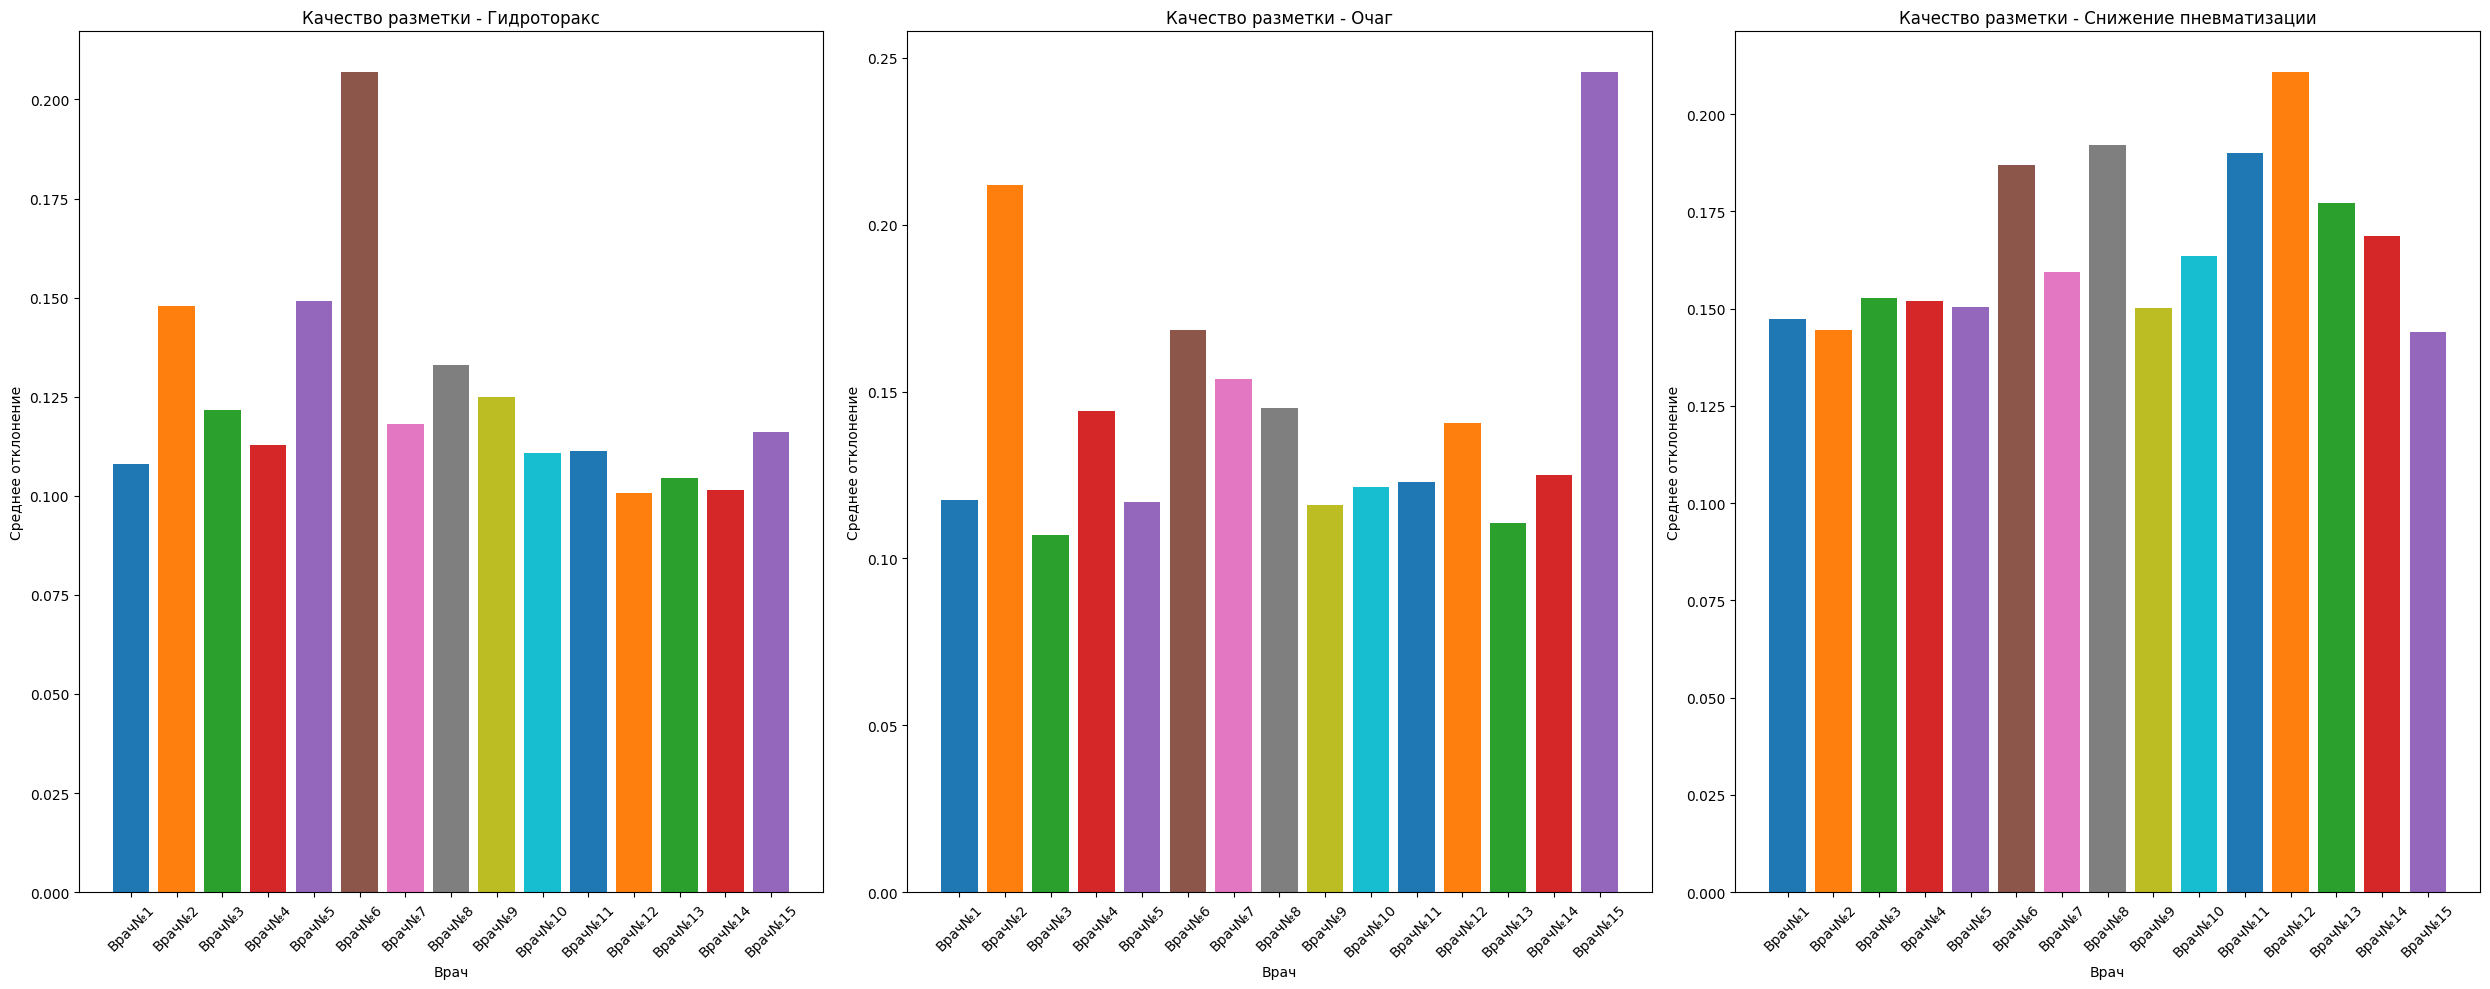

In [17]:
# Построение графиков для каждой патологии
plt.figure(figsize=(25, 10))

colors = list(mcolors.TABLEAU_COLORS.values())[:15]

plt.subplot(1, 3, 1)
plt.bar(deviation_hydrothorax.index, deviation_hydrothorax.values, color=colors)
plt.title('Качество разметки - Гидроторакс')
plt.xlabel('Врач')
plt.ylabel('Среднее отклонение')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
plt.bar(deviation_focus.index, deviation_focus.values, color=colors)
plt.title('Качество разметки - Очаг')
plt.xlabel('Врач')
plt.ylabel('Среднее отклонение')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
plt.bar(deviation_reduced_pneumatization.index, deviation_reduced_pneumatization.values, color=colors)
plt.title('Качество разметки - Снижение пневматизации')
plt.xlabel('Врач')
plt.ylabel('Среднее отклонение')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Создадим словари с отклонениями врачей по каждой патологии и отсортируем их, чтобы увидеть, какие врачи хуже классифицируют конкретные патологии

In [18]:
# Создание словарей с отклонениями по каждой патологии, ключ - Врач, значение - его отклонение от среднего
deviation_hydrothorax_dict = deviation_hydrothorax.to_dict()
deviation_focus_dict = deviation_focus.to_dict()
deviation_reduced_pneumatization_dict = deviation_reduced_pneumatization.to_dict()

# Создание отсортированных словарей по значениям отклонений
sorted_deviation_hydrothorax = {k: v for k, v in sorted(deviation_hydrothorax_dict.items(), key=lambda item: item[1], reverse=True)}
sorted_deviation_focus = {k: v for k, v in sorted(deviation_focus_dict.items(), key=lambda item: item[1], reverse=True)}
sorted_deviation_reduced_pneumatization = {k: v for k, v in sorted(deviation_reduced_pneumatization_dict.items(), key=lambda item: item[1], reverse=True)}

In [19]:
print('Отклонения по Гидротораксу')
for doctor, deviation in sorted_deviation_hydrothorax.items():
    rounded_deviation = round(deviation, 4)  # Округляем до четвёртого знака
    print(f'{doctor}: {rounded_deviation}')

Отклонения по Гидротораксу
Врач№6: 0.2068
Врач№5: 0.1493
Врач№2: 0.1479
Врач№8: 0.1329
Врач№9: 0.1248
Врач№3: 0.1217
Врач№7: 0.1181
Врач№15: 0.116
Врач№4: 0.1129
Врач№11: 0.1114
Врач№10: 0.1108
Врач№1: 0.108
Врач№13: 0.1044
Врач№14: 0.1015
Врач№12: 0.1006


In [20]:
print('Отклонения по Очагу')
for doctor, deviation in sorted_deviation_focus.items():
    rounded_deviation = round(deviation, 4)  
    print(f'{doctor}: {rounded_deviation}')

Отклонения по Очагу
Врач№15: 0.2457
Врач№2: 0.2119
Врач№6: 0.1686
Врач№7: 0.1539
Врач№8: 0.1451
Врач№4: 0.1441
Врач№12: 0.1407
Врач№14: 0.1249
Врач№11: 0.123
Врач№10: 0.1215
Врач№1: 0.1175
Врач№5: 0.1168
Врач№9: 0.1161
Врач№13: 0.1106
Врач№3: 0.1069


In [21]:
print('Отклонения по Снижению пневматизации')
for doctor, deviation in sorted_deviation_reduced_pneumatization.items():
    rounded_deviation = round(deviation, 4)  
    print(f'{doctor}: {rounded_deviation}')

Отклонения по Снижению пневматизации
Врач№12: 0.2108
Врач№8: 0.192
Врач№11: 0.1901
Врач№6: 0.187
Врач№13: 0.1771
Врач№14: 0.1687
Врач№10: 0.1637
Врач№7: 0.1595
Врач№3: 0.1526
Врач№4: 0.1519
Врач№5: 0.1505
Врач№9: 0.1501
Врач№1: 0.1474
Врач№2: 0.1445
Врач№15: 0.1441


Новую итоговую метку для каждого образца будем выбирать по принципу простого большинства. Уверенность в новой классификации будем считать как долю врачей, которые отметили наличие патологии.

In [22]:
def new_classification(data_csv):
    df = data_csv.drop(columns=['ID Файла'])
    # Вычисляем метку большинства (простое большинство)
    
    num_doctors = df.shape[1]
    # Вычисляем количество единиц (1) в каждой строке
    count_ones = df.sum(axis=1)
        
    # Вычисляем метку большинства (простое большинство)
    majority_label = (count_ones >= num_doctors / 2).astype(int)
        
    # Вычисляем уверенность в новой классификации
    confidence = df.apply(lambda row: row[row == majority_label[row.name]].count() / num_doctors, axis=1)
    
    # Создаем новый датафрейм с результатами
    new_dataset = pd.DataFrame({
        'ID Файла': data_csv['ID Файла'],
        'Метка': majority_label,
        'Уверенность': confidence
    })
    new_dataset.index = new_dataset.index + 1
    
    return new_dataset       

In [23]:
new_hydrothorax = new_classification(hydrothorax_csv)
new_focus = new_classification(focus_csv)
new_reduced_pneumatization = new_classification(reduced_pneumatization_csv)

Ниже представлены датафреймы с новыми метками объектов из, соответственно, Гидраторакс.csv, Очаг.csv и Снижение пневматизации.csv, и степенями уверенности в данных метках.

In [24]:
#Новые метки для Гидроторакса
new_hydrothorax

,ID Файла,Метка,Уверенность
1,0,1,0.733333
2,1,0,0.866667
3,2,0,0.666667
4,3,0,0.600000
5,4,0,1.000000
...,...,...,...
473,472,0,0.933333
474,473,1,0.533333
475,474,0,0.600000
476,475,1,0.800000


In [25]:
#Новые метки для Очага
new_focus

,ID Файла,Метка,Уверенность
1,0,0,0.866667
2,1,0,1.000000
3,2,0,0.933333
4,3,0,1.000000
5,4,0,0.800000
...,...,...,...
473,472,0,1.000000
474,473,0,0.733333
475,474,0,1.000000
476,475,0,1.000000


In [26]:
#Новые метки для Снижения пневматизации
new_reduced_pneumatization

,ID Файла,Метка,Уверенность
1,0,0,0.733333
2,1,0,0.933333
3,2,0,0.933333
4,3,0,1.000000
5,4,0,0.800000
...,...,...,...
473,472,0,0.866667
474,473,0,0.800000
475,474,0,1.000000
476,475,0,1.000000


Теперь, зная истинные метки каждого из объектов, с помощью метрик бинарной классификации мы можем оценить точность разметки каждого из докторов. В качестве ключевой метрики использовалась F-мера (устойчива к несбалансированности классов и в целом является одной из наиболее предпочтительных метрик бинарной классификации).

In [27]:
# Функция для вычисления матрицы ошибок для каждого врача
def compute_confusion_matrices(data_csv, new_data_csv):
    df = data_csv.drop(columns=['ID Файла'])
    new_df = new_data_csv['Метка']
    confusion_matrices = []
    
    for col in df.columns:
        y_true = new_df
        y_pred = df[col]
        cm = confusion_matrix(y_true, y_pred)
        confusion_matrices.append(cm)
    
    return confusion_matrices

In [28]:
# Функция для вычисления F-меры для каждого врача
def compute_f1_scores(data_csv, new_data_csv):
    df = data_csv.drop(columns=['ID Файла'])
    new_df = new_data_csv['Метка']
    f1_scores = []
    
    for col in df.columns:
        y_true = new_df
        y_pred = df[col]
        f1 = f1_score(y_true, y_pred)
        f1_scores.append(f1)
    
    return f1_scores

In [29]:
# Функция для построения ROC-кривой для каждого врача
def plot_roc_curves(data_csv, new_data_csv):
    df = data_csv.drop(columns=['ID Файла'])
    new_df = new_data_csv['Метка']
    plt.figure(figsize=(8, 6))
    
    for col in df.columns:
        y_true = new_df
        y_scores = df[col]
        fpr, tpr, _ = roc_curve(y_true, y_scores)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Врач {col} (AUC = {roc_auc:.2f})')
    
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

In [30]:
# Вызов функций для каждой патологии
hydrothorax_confusion_matrices = compute_confusion_matrices(hydrothorax_csv, new_hydrothorax)
focus_confusion_matrices = compute_confusion_matrices(focus_csv, new_focus)
reduced_pneumatization_confusion_matrices = compute_confusion_matrices(reduced_pneumatization_csv, new_reduced_pneumatization)

hydrothorax_f1_scores = compute_f1_scores(hydrothorax_csv, new_hydrothorax)
focus_f1_scores = compute_f1_scores(focus_csv, new_focus)
reduced_pneumatization_f1_scores = compute_f1_scores(reduced_pneumatization_csv, new_reduced_pneumatization)

In [31]:
# Вывод матрицы ошибок для каждого врача по Гидротораксу
for i, cm in enumerate(hydrothorax_confusion_matrices):
    print(f'Матрица ошибок для врача {i+1} (гидроторакс):')
    print(cm)
    print()

Матрица ошибок для врача 1 (гидроторакс):
[[398   9]
 [ 22  48]]

Матрица ошибок для врача 2 (гидроторакс):
[[352  55]
 [  3  67]]

Матрица ошибок для врача 3 (гидроторакс):
[[406   1]
 [ 46  24]]

Матрица ошибок для врача 4 (гидроторакс):
[[381  26]
 [  2  68]]

Матрица ошибок для врача 5 (гидроторакс):
[[372  35]
 [ 25  45]]

Матрица ошибок для врача 6 (гидроторакс):
[[318  89]
 [  3  67]]

Матрица ошибок для врача 7 (гидроторакс):
[[397  10]
 [ 27  43]]

Матрица ошибок для врача 8 (гидроторакс):
[[400   7]
 [ 46  24]]

Матрица ошибок для врача 9 (гидроторакс):
[[380  27]
 [ 16  54]]

Матрица ошибок для врача 10 (гидроторакс):
[[388  19]
 [ 14  56]]

Матрица ошибок для врача 11 (гидроторакс):
[[402   5]
 [ 30  40]]

Матрица ошибок для врача 12 (гидроторакс):
[[391  16]
 [  6  64]]

Матрица ошибок для врача 13 (гидроторакс):
[[391  16]
 [ 11  59]]

Матрица ошибок для врача 14 (гидроторакс):
[[392  15]
 [  9  61]]

Матрица ошибок для врача 15 (гидроторакс):
[[382  25]
 [  7  63]]


In [32]:
# Вывод матрицы ошибок для каждого врача по Очагу
for i, cm in enumerate(focus_confusion_matrices):
    print(f'Матрица ошибок для врача {i+1} (очаг):')
    print(cm)
    print()

Матрица ошибок для врача 1 (очаг):
[[424  24]
 [  3  26]]

Матрица ошибок для врача 2 (очаг):
[[360  88]
 [  4  25]]

Матрица ошибок для врача 3 (очаг):
[[439   9]
 [ 12  17]]

Матрица ошибок для врача 4 (очаг):
[[407  41]
 [ 12  17]]

Матрица ошибок для врача 5 (очаг):
[[437  11]
 [ 13  16]]

Матрица ошибок для врача 6 (очаг):
[[392  56]
 [  6  23]]

Матрица ошибок для врача 7 (очаг):
[[405  43]
 [ 12  17]]

Матрица ошибок для врача 8 (очаг):
[[420  28]
 [ 28   1]]

Матрица ошибок для врача 9 (очаг):
[[430  18]
 [  9  20]]

Матрица ошибок для врача 10 (очаг):
[[421  27]
 [  8  21]]

Матрица ошибок для врача 11 (очаг):
[[429  19]
 [ 15  14]]

Матрица ошибок для врача 12 (очаг):
[[402  46]
 [  5  24]]

Матрица ошибок для врача 13 (очаг):
[[436  12]
 [ 13  16]]

Матрица ошибок для врача 14 (очаг):
[[427  21]
 [ 11  18]]

Матрица ошибок для врача 15 (очаг):
[[335 113]
 [  1  28]]


In [33]:
# Вывод матрицы ошибок для каждого врача по Снижению пневматизации
for i, cm in enumerate(reduced_pneumatization_confusion_matrices):
    print(f'Матрица ошибок для врача {i+1} (снижение пневматизации):')
    print(cm)
    print()

Матрица ошибок для врача 1 (снижение пневматизации):
[[392  26]
 [ 13  46]]

Матрица ошибок для врача 2 (снижение пневматизации):
[[408  10]
 [ 30  29]]

Матрица ошибок для врача 3 (снижение пневматизации):
[[398  20]
 [ 28  31]]

Матрица ошибок для врача 4 (снижение пневматизации):
[[390  28]
 [ 21  38]]

Матрица ошибок для врача 5 (снижение пневматизации):
[[392  26]
 [ 21  38]]

Матрица ошибок для врача 6 (снижение пневматизации):
[[346  72]
 [  2  57]]

Матрица ошибок для врача 7 (снижение пневматизации):
[[407  11]
 [ 42  17]]

Матрица ошибок для врача 8 (снижение пневматизации):
[[381  37]
 [ 45  14]]

Матрица ошибок для врача 9 (снижение пневматизации):
[[385  33]
 [ 11  48]]

Матрица ошибок для врача 10 (снижение пневматизации):
[[377  41]
 [ 12  47]]

Матрица ошибок для врача 11 (снижение пневматизации):
[[355  63]
 [  9  50]]

Матрица ошибок для врача 12 (снижение пневматизации):
[[344  74]
 [ 14  45]]

Матрица ошибок для врача 13 (снижение пневматизации):
[[356  62]
 [  3  5

In [34]:
# Вывод F-меры для каждого врача по Гидротораксу
hydrothorax_f1_scores_sorted = sorted(enumerate(hydrothorax_f1_scores), key=lambda x: x[1])

print("Отсортированные F-меры для Гидроторакса:")
for i, (doctor, f1) in enumerate(hydrothorax_f1_scores_sorted):
    print(f'Врач {doctor + 1}: {f1:.4f}')

Отсортированные F-меры для Гидроторакса:
Врач 8: 0.4752
Врач 3: 0.5053
Врач 6: 0.5929
Врач 5: 0.6000
Врач 11: 0.6957
Врач 2: 0.6979
Врач 7: 0.6992
Врач 9: 0.7152
Врач 1: 0.7559
Врач 10: 0.7724
Врач 15: 0.7975
Врач 13: 0.8138
Врач 4: 0.8293
Врач 14: 0.8356
Врач 12: 0.8533


In [35]:
# Вывод F-меры для каждого врача по Очагу
focus_f1_scores_sorted = sorted(enumerate(focus_f1_scores), key=lambda x: x[1])

print("Отсортированные F-меры для Очага:")
for i, (doctor, f1) in enumerate(focus_f1_scores_sorted):
    print(f'Врач {doctor + 1}: {f1:.4f}')

Отсортированные F-меры для Очага:
Врач 8: 0.0345
Врач 15: 0.3294
Врач 2: 0.3521
Врач 7: 0.3820
Врач 4: 0.3908
Врач 6: 0.4259
Врач 11: 0.4516
Врач 12: 0.4848
Врач 14: 0.5294
Врач 10: 0.5455
Врач 13: 0.5614
Врач 5: 0.5714
Врач 9: 0.5970
Врач 3: 0.6182
Врач 1: 0.6582


In [36]:
# Вывод F-меры для каждого врача по Снижению пневматизации
reduced_pneumatization_f1_scores_sorted = sorted(enumerate(reduced_pneumatization_f1_scores), key=lambda x: x[1])

print("Отсортированные F-меры для Снижения пневматизации:")
for i, (doctor, f1) in enumerate(reduced_pneumatization_f1_scores_sorted):
    print(f'Врач {doctor + 1}: {f1:.4f}')

Отсортированные F-меры для Снижения пневматизации:
Врач 8: 0.2545
Врач 7: 0.3908
Врач 12: 0.5056
Врач 15: 0.5631
Врач 3: 0.5636
Врач 11: 0.5814
Врач 2: 0.5918
Врач 6: 0.6064
Врач 4: 0.6080
Врач 5: 0.6179
Врач 13: 0.6328
Врач 10: 0.6395
Врач 14: 0.6623
Врач 9: 0.6857
Врач 1: 0.7023


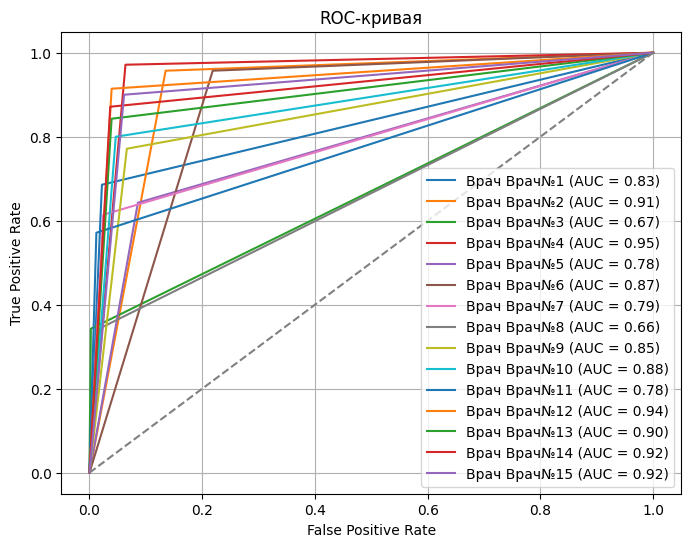

In [37]:
# Построение ROC-кривой для каждого врача по Гидротораксу
plot_roc_curves(hydrothorax_csv, new_hydrothorax)

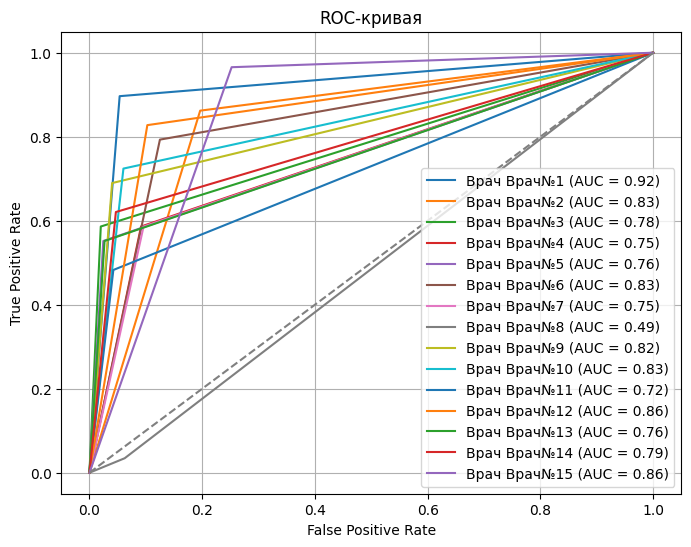

In [38]:
# Построение ROC-кривой для каждого врача по Очагу
plot_roc_curves(focus_csv, new_focus)

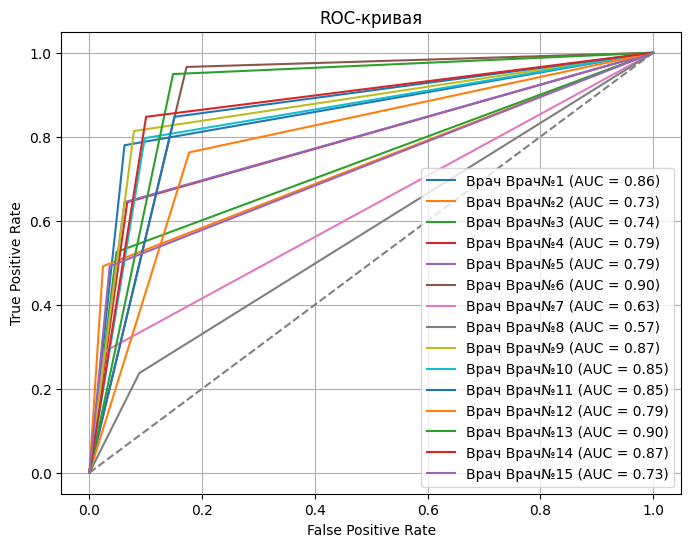

In [39]:
# Построение ROC-кривой для каждого врача по Снижению пневматизации
plot_roc_curves(reduced_pneumatization_csv, new_reduced_pneumatization)

На основании данных, представленных выше, можно сделать определённые выводы, касающиеся n худших (с точки зрения качества классификации конкретных патологий) врачей по каждому из трёх наборов данных.

Теперь попробуем оценить итоговое качество разметки по каждой конкретной патологии. Для этого используем среднее значение уверенности в классификации по всем объектам для каждой категории.

In [40]:
# Средняя уверенность по каждой патологии
mean_confidence_hydrothorax = new_hydrothorax['Уверенность'].mean()
mean_confidence_focus = new_focus['Уверенность'].mean()
mean_confidence_reduced_pneumatization = new_reduced_pneumatization['Уверенность'].mean()

print(f"Средняя уверенность для Гидроторакса: {mean_confidence_hydrothorax:.2f}")
print(f"Средняя уверенность для Очага: {mean_confidence_focus:.2f}")
print(f"Средняя уверенность для Снижения пневматизации: {mean_confidence_reduced_pneumatization:.2f}")

Средняя уверенность для Гидроторакса: 0.91
Средняя уверенность для Очага: 0.90
Средняя уверенность для Снижения пневматизации: 0.88
